<a href="https://colab.research.google.com/github/aishah0/parkinsons-project-data/blob/main/Parkinson's_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parkinson’s Disease Early Detection – Analysis Notebook

### Objective
This project aims to identify the strongest risk factors and early indicators of Parkinson’s Disease using a dataset containing demographic, lifestyle, clinical, and neurological variables.

### Load and Explore Dataset


In [254]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

###1. Importing and previewing our data

In [255]:
url = 'https://raw.githubusercontent.com/aishah0/parkinsons-project-data/refs/heads/main/parkinsons_disease_data.csv'
df = pd.read_csv(url)
df.head()



,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.619878,0,5.108241,1.380660,3.893969,9.283194,0,0,0,0,0,0,129,60,222.842278,148.125623,37.867776,337.307114,6.458713,29.181289,1.572427,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247339,1,6.027648,8.409804,8.513428,5.602470,0,0,0,0,0,0,163,76,210.501133,153.756463,77.228117,264.635521,37.306703,12.332639,4.787551,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368239,0,2.242135,0.213275,6.498805,9.929824,0,0,0,1,0,0,113,93,287.387996,118.702600,85.588304,395.662649,67.838170,29.927783,2.130686,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.454557,0,5.997788,1.375045,6.715033,4.196189,0,0,0,0,0,0,146,78,280.339546,136.299186,51.869626,362.189688,52.964696,21.304268,3.391288,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616042,0,9.775243,1.188607,4.657572,9.363925,0,0,0,0,0,0,115,94,284.014151,108.449452,25.069418,149.956586,21.804880,8.336364,3.200969,0,0,0,1,0,1,0,0,DrXXXConfid


### 2. Data Cleaning
#### a. Checking for missing values

In [256]:
df.info()         # Shows column types, null counts
df.describe()     # Summary stats for numeric columns
df.isnull().sum() # Total missing values per column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PatientID                 2105 non-null   int64  
 1   Age                       2105 non-null   int64  
 2   Gender                    2105 non-null   int64  
 3   Ethnicity                 2105 non-null   int64  
 4   EducationLevel            2105 non-null   int64  
 5   BMI                       2105 non-null   float64
 6   Smoking                   2105 non-null   int64  
 7   AlcoholConsumption        2105 non-null   float64
 8   PhysicalActivity          2105 non-null   float64
 9   DietQuality               2105 non-null   float64
 10  SleepQuality              2105 non-null   float64
 11  FamilyHistoryParkinsons   2105 non-null   int64  
 12  TraumaticBrainInjury      2105 non-null   int64  
 13  Hypertension              2105 non-null   int64  
 14  Diabetes

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


As shown above, there are no missing values.

#### b. Handling non-numeric columns

We recognize that any non-numeric columns in our dataset need to be encoded. In other words, these variables need to be converted into a numerical format to allow our machine learning model understand and work with this data.

After examining our dataset for non-numerical values, we realized the only column containing non-numeric data was `DoctorInCharge`. However, this column contains identifiers and does not contribute to predicting Parkinson's Disease. Including it would add noise and potentially introduce bias if the same doctor sees specific types of patients.

Therefore, we drop it in to focus only on meaningful and predictive features, as shown in the code cell below. Afterwards, we check that all remaining columns are numeric and ready for modeling.

**Note:also explain why PatientID was dropped**




In [257]:

#dropping DoctorInCharge
df.drop(columns=['DoctorInCharge'], inplace=True)
df.drop(columns=['PatientID'], inplace=True)

#checking to ensure remaining columns are numeric
df.dtypes.value_counts()

,count
int64,21
float64,12


The output above shows that the dataset contains 22 `int64` (integer) columns and 12 `float64` (decimal) columns. This confirms that all features in the dataset are numeric and that categorical and non-predictive features (such as `DoctorInCharge`) have been successfully removed.

####c. Encoding

Next, we examine our categorical variables and determine which ones need encoding. We recognize that not all categorical variables should be treated the same. Some require one-hot encoding, while others are better handled with label encoding or left as-is depending on their structure and meaning. Label encoding can be risky for unordered categories (categories without a clear order, e.g. race) , since the model may think the values have meaning. We need to treat each variable type appropriately. Below is our reasoning behind whether or not each category requires encoding:

**Gender**
- Originally uses label encoding. It is a binary categorical variable with values 0 (Male) and 1 (Female).
- The label encoding used is sufficient since the values do not imply any ordinal relationship and the binary structure is already ideal. No further encoding is necessary.

**Ethnicity**
- Is originally a nominal variable (Caucasian, African American, Asian, Other)stored as numeric codes 0–3. However, these numbers are label-encoded, which wrongly suggests a ranked relationship (e.g., that 3 > 1).
- We apply one-hot encoding to replace the existing numeric codes with binary dummy variables for each category. This allows the model to treat each ethnicity independently, without assuming any ordinal relationship.

**EducationLevel**
- This is an ordinal categorical variable, where 0 = None, 1 = High School, 2 = Bachelor's, and 3 = Higher.
- These categories follow a natural progression in educational attainment, so label encoding is appropriate here because the order carries meaningful information that the model can learn from. No further encoding is necessary.

**Other Binary Categorical Variables** (0 = No, 1 = Yes)
- Variables like `Smoking`, `Depression`, `FamilyHistoryParkinsons`, `Stroke`, `Tremor`, `Constipation`, etc. are origially numerical and binary (0 or 1).
- No further encoding is necessary since the values already represent clear binary categories suitable for modeling.

**Continuous Variables**
- All other columns, such as `Age`, `BMI`, `SleepScore`, `MoCA`, `UPDRS`, `Cholesterol`, etc., are originally numeric and and continuous.
- No further encoding is necessary. These values need to be kept in their original form to preserve the granularity needed for effective prediction.


Thus, the only variable we have decided to encode is `Ethnicity`. This variable has four categories with no natural order, so we apply one-hot encoding to remove any implied ordinal relationship.

The code in the cell below creates a separate binary variable for each ethnicity, allowing the model to treat each group independently.


In [258]:
#creating columns for each ethnicity
df = pd.get_dummies(df, columns=['Ethnicity'], prefix='Ethnicity', drop_first=False)

# Renaming columns for clarity
df.rename(columns={
    'Ethnicity_0': 'Ethnicity_Caucasian',
    'Ethnicity_1': 'Ethnicity_AfricanAmerican',
    'Ethnicity_2': 'Ethnicity_Asian',
    'Ethnicity_3': 'Ethnicity_Other'
}, inplace=True)

df.filter(like='Ethnicity').head()

,Ethnicity_Caucasian,Ethnicity_AfricanAmerican,Ethnicity_Asian,Ethnicity_Other
0,False,False,False,True
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False


After one-hot encoding the `ethnicity` variable into four separate columns, we converted the resulting boolean values (`True`/`False`) to binary integers (`1`/`0`). This step ensures consistency across the dataset, as all other binary variables (e.g., `Diagnosis`, `Smoking`) are also represented as 0 or 1. The uniform format should improve clarity during statistical analysis, visualization, and model training.

In [259]:
#converting from boolean to integer values
ethnicity_cols = ['Ethnicity_Caucasian', 'Ethnicity_AfricanAmerican', 'Ethnicity_Asian', 'Ethnicity_Other']
df[ethnicity_cols] = df[ethnicity_cols].astype(int)
df.filter(like='Ethnicity').head()

,Ethnicity_Caucasian,Ethnicity_AfricanAmerican,Ethnicity_Asian,Ethnicity_Other
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


####d. Outlier Detection

We inspect for outliers using statistical IQR methods. The selected features were assessed for values falling beyond 1.5×IQR from the quartiles. The code cell below exemplifies the process with the UPDRS feature, and shows the result (no outliers were detected). The same code was used to test the following features:
- Age
- BMI
- *list the rest*

None of the features contained outliers.

In [260]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# 📌 Check for outliers in UPDRS
updrs_outliers = find_outliers_iqr(df, 'UPDRS')
print(f"Number of UPDRS outliers: {len(updrs_outliers)}")

Number of UPDRS outliers: 0


###3. Feature Engineering
####a. Interaction Terms

Based on the hypothesis that poor sleep and depression combined might be a stronger indicator of Parkinson's than either alone, we engineer an interaction between Sleep Quality and Depression.

**(Need research to back this up loll idek if its true i think i got it from google ai??)**

In [261]:
# creating interaction term of SleepQuality × Depression
df['SleepDepressionInteraction'] = df['SleepQuality'] * df['Depression']

####b. Composite Indices
We also engineer Cardiometabolic Risk Index as a composite index aggregating BMI, diabetes status, and total cholesterol to reflect cardiometabolic burden.

Additionally, we engineer Neuropsychiatric Burden Index, which combines depression status and reversed sleep quality score, with lower sleep quality contributing to higher neuropsychiatric burden.


**Research needed againnn**

In [262]:
# Cardiometabolic Risk Index
df['CardiometabolicRisk'] = df['BMI'] + df['Diabetes'] + df['CholesterolTotal']

#Neuropsychiatric Burden Index, where lower sleep = higher burden
df['NeuropsychiatricBurden'] = df['Depression'] + (10 - df['SleepQuality'])

####c. Binning variables

UPDRS (Unified Parkinson's Disease Rating Scale) ranges from 0–199. We engineered a binned version of the UPDRS score, grouping patients into early-stage (0) and advanced-stage (1) Parkinson’s based on clinical severity cutoffs.

In the code cell below, we create a new column that categorizes patients into:

0: Early Stage (0–80)
1: Advanced Stage (81–199)

In [263]:
# binning UPDRS scores into early vs. advanced stage
df['PD_Stage'] = pd.cut(df['UPDRS'], bins=[-1, 80, 200], labels=[0, 1]).astype(int)


The table below displays a subset of the dataset with the newly created engineered features. This helps validate that calculations and transformations were applied correctly before proceeding with analysis and modeling.

In [264]:
# previewing the new engineered columns
df[['SleepQuality', 'Depression', 'SleepDepressionInteraction',
    'BMI', 'Diabetes', 'CholesterolTotal', 'CardiometabolicRisk',
    'NeuropsychiatricBurden', 'UPDRS', 'PD_Stage']].head(10)

,SleepQuality,Depression,SleepDepressionInteraction,BMI,Diabetes,CholesterolTotal,CardiometabolicRisk,NeuropsychiatricBurden,UPDRS,PD_Stage
0,9.283194,0,0.00000,19.619878,0,222.842278,242.462156,0.716806,6.458713,0
1,5.602470,0,0.00000,16.247339,0,210.501133,226.748472,4.397530,37.306703,0
2,9.929824,0,0.00000,15.368239,1,287.387996,303.756234,0.070176,67.838170,0
3,4.196189,0,0.00000,15.454557,0,280.339546,295.794103,5.803811,52.964696,0
4,9.363925,0,0.00000,18.616042,0,284.014151,302.630193,0.636075,21.804880,0
5,7.737549,0,0.00000,39.423311,0,290.133122,329.556434,2.262451,101.912536,1
6,5.981984,0,0.00000,30.542003,0,283.503014,314.045017,4.018016,37.453720,0
7,7.895866,0,0.00000,36.758282,1,185.203703,222.961985,2.104134,181.172565,1
8,4.170470,0,0.00000,22.380587,1,274.970149,298.350735,5.829530,178.261521,1
9,9.245380,1,9.24538,23.727086,0,204.471842,228.198928,1.754620,115.965869,1


###4. Exploratory Data Analysis
Here, we summarize the central tendencies and distribution of features, and explore correlations between predictors and Parkinson’s diagnosis to inform modeling later

####a. Descriptive Statistics

Below, we compute summary statistics for key numerical features to understand the general characteristics of the dataset. All variables are examined to assess distributions and detect potential anomalies or outliers.


In [265]:
df.describe()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,Ethnicity_Caucasian,Ethnicity_AfricanAmerican,Ethnicity_Asian,Ethnicity_Other,SleepDepressionInteraction,CardiometabolicRisk,NeuropsychiatricBurden,PD_Stage
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,69.601900,0.492637,1.337292,27.209493,0.296437,10.040413,5.016674,4.912901,6.996639,0.145843,0.106413,0.145843,0.148219,0.205226,0.048931,133.719715,90.249881,226.860840,126.147858,59.670352,222.940500,101.415318,15.094314,4.989694,0.431829,0.252732,0.207601,0.138717,0.295012,0.245131,0.296912,0.619477,0.603325,0.201900,0.093587,0.101188,1.444472,254.218551,3.208587,0.618527
std,11.594511,0.500065,0.895840,7.208099,0.456795,5.687014,2.890919,2.872115,1.753065,0.353033,0.308439,0.353033,0.355401,0.403962,0.215775,26.502355,17.061488,43.589406,43.407036,23.370920,101.895822,56.591448,8.643014,2.933877,0.495449,0.434682,0.405686,0.345733,0.456156,0.430267,0.457006,0.485631,0.489324,0.401514,0.291322,0.301649,2.951426,44.248430,1.794227,0.485864
min,50.000000,0.000000,0.000000,15.008333,0.000000,0.002228,0.004157,0.000011,4.000497,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.062698,50.022828,20.027981,50.113604,0.028441,0.021191,0.001505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,167.407882,0.000179,0.000000
25%,60.000000,0.000000,1.000000,20.782176,0.000000,5.150278,2.455703,2.478503,5.488864,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,75.000000,189.385178,88.841960,39.538643,132.520174,53.048148,7.517160,2.415890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,216.544585,1.677682,0.000000
50%,70.000000,0.000000,1.000000,27.184571,0.000000,10.070337,5.031550,4.825187,6.929819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,133.000000,91.000000,228.528256,126.884570,59.343357,222.802452,102.561023,14.963574,4.983227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,254.590710,3.239549,1.000000
75%,80.000000,1.000000,2.000000,33.462452,1.000000,14.829565,7.512795,7.381487,8.558719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,264.608100,163.912782,79.366628,311.699109,149.831682,22.608362,7.484220,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,291.824394,4.699455,1.000000
max,89.000000,1.000000,3.000000,39.999887,1.000000,19.988866,9.995255,9.995864,9.999821,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,119.000000,299.963074,199.985981,99.982265,399.975022,198.953604,29.970107,9.992697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.989376,339.208919,6.981687,1.000000


####b.  Value Counts for Categorical Variables
This gives us insight into class balance, especially for our target (Diagnosis).

In [266]:
df['Diagnosis'].value_counts(normalize=True)

,proportion
Diagnosis,
1,0.619477
0,0.380523


####c. Correlation Matrix

To identify potential early indicators of Parkinson's Disease, we calculated the Pearson correlation coefficient between all available features and the binary `Diagnosis` label.This analysis helps in selecting the most relevant predictors for our classification model.

In [270]:
# Computing the correlation matrix for all numeric features
correlation_matrix = df.corr()

# Viewing the correlation of each feature with the Diagnosis column
correlation_with_diagnosis = correlation_matrix['Diagnosis'].drop('Diagnosis').sort_values(ascending=False)
correlation_with_diagnosis

,Diagnosis
UPDRS,0.398006
PD_Stage,0.367498
Tremor,0.274370
Rigidity,0.185611
Bradykinesia,0.184042
PosturalInstability,0.147519
Age,0.065344
Depression,0.059080
Diabetes,0.057067
NeuropsychiatricBurden,0.055604


The results above show that motor-related clinical measures (`UPDRS`, `PD_Stage`, `Tremor`, `Rigidity`, etc.) were the strongest positively correlated indicators, which aligns with existing diagnostic criteria for PD. Non-motor symptoms like `Depression` and `SleepDepressionInteraction` also showed mild to moderate associations.

Notably, functional assessments had the strongest negative correlation, indicating that decreased functionality is linked with disease presence. Lifestyle and cardiovascular risk factors (e.g., BMI, cholesterol, alcohol) showed minimal direct correlation but may contribute through interactions or nonlinear relationships.

These insights justify the later step of applying machine learning to capture more complex patterns.


####d.  Bar Plot of Top Correlations with Diagnosis
 Below is a bar plot showing the top 15 features with the strongest positive and negative correlations. Features with higher positive correlations suggest stronger presence in patients with PD, while negative correlations may indicate protective or inverse associations. This visualization helps narrow down which features may be most useful in early prediction modeling and justifies their selection in our machine learning models.

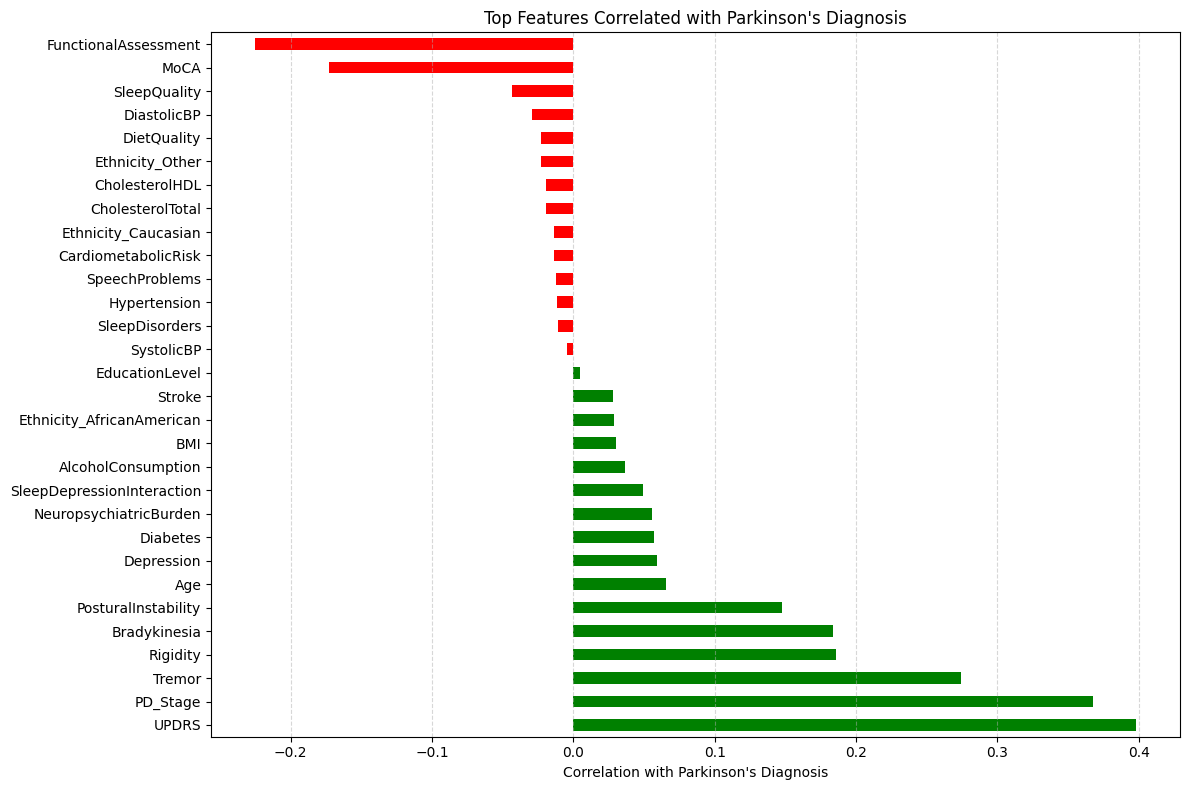

In [271]:
import matplotlib.pyplot as plt

# Select the top 15 positively and negatively correlated features
top_positive = correlation_with_diagnosis.head(15)
top_negative = correlation_with_diagnosis.tail(15)
top_features = pd.concat([top_positive, top_negative])

# Plot
plt.figure(figsize=(12, 8))
top_features.plot(kind='barh', color=['green' if x > 0 else 'red' for x in top_features])
plt.xlabel('Correlation with Parkinson\'s Diagnosis')
plt.title('Top Features Correlated with Parkinson\'s Diagnosis')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


####e. Heatmap of Lifestyle Factors vs. Parkinson’s Symptoms

To better understand the potential influence of modifiable lifestyle factors on PD symptom expression, we create a heatmap showing correlations between key lifestyle variables and core PD symptoms.

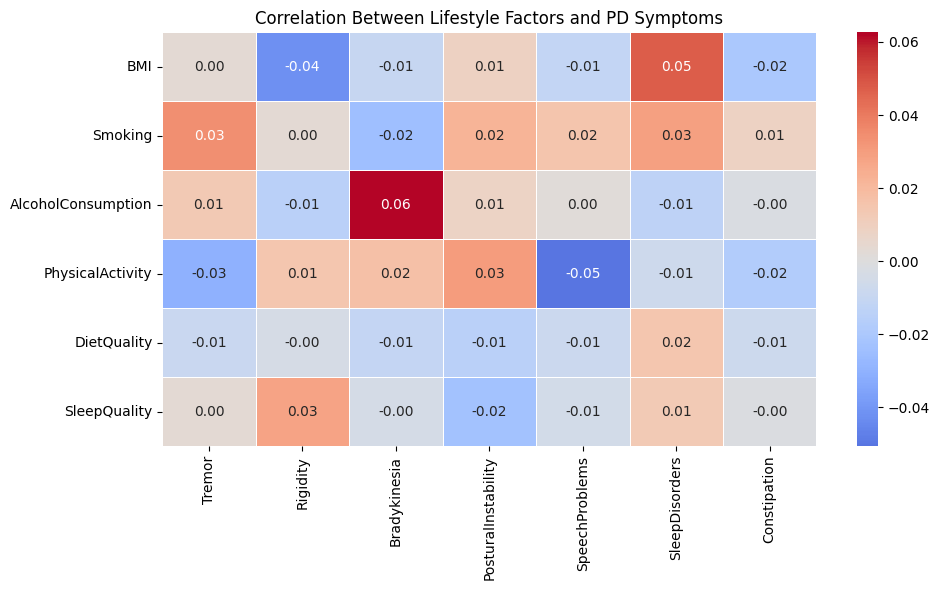

In [272]:
import seaborn as sns


lifestyle_vars = ['BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
                  'DietQuality', 'SleepQuality']
symptom_vars = ['Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
                'SpeechProblems', 'SleepDisorders', 'Constipation']


heatmap_data = df[lifestyle_vars + symptom_vars].corr().loc[lifestyle_vars, symptom_vars]


plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Lifestyle Factors and PD Symptoms')
plt.tight_layout()
plt.show()


The analysis above revealed generally weak linear associations across the board. The highest observed correlation was 0.06 between alcohol consumption and bradykinesia.